# Programming with Python
# Master DSE - 01 2022
## PyWorldTemp

### Steps
- Import Class & Libraries
- Load - Check - Adjust - Clean the dataset
- Statistics
- Visualization with GEOPANDAS


### Import Class & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load - Check - Adjust - Clean the dataset

In [2]:
# LOAD dataset
file = './Dataset_archive/GlobalLandTemperaturesByCity.csv'
glob_temp = pd.read_csv(file)

In [3]:
# CHECK
glob_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [4]:
# Look for a NaN values in the dataset
glob_temp.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [5]:
#Remove records where NaN value is present
df = glob_temp.dropna()
df.shape

(8235082, 7)

In [6]:
#look head and tail
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E


In [7]:
df.tail(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [8]:
# ADJUST
#Conversion column 'dt' values for future analysis and time series
# remove hyphens "-" in dates
# convert dates values to int type
df.loc[:,:1] = pd.to_numeric(df.dt.str.replace('-',''))

<ipython-input-8-48ef81e67f35>:5: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:,:1] = pd.to_numeric(df.dt.str.replace('-',''))
/Users/pmarincola/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [9]:
# divide for 10000 to truncate the last 4 digits in order to obtain only year value
df.loc[:,'dt'] = df.dt.floordiv(10000)

/Users/pmarincola/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
#verify new date format
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744,10.644,1.283,Århus,Denmark,57.05N,10.33E


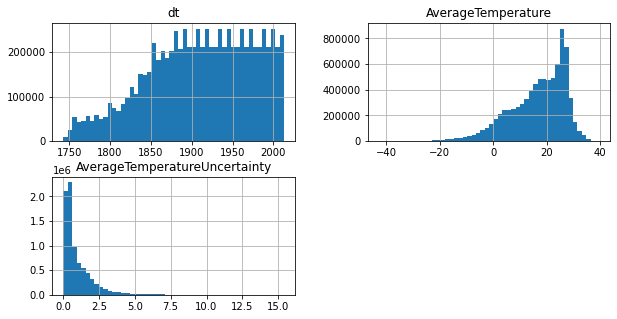

In [11]:
#Look for the numerical data in the dataset
df.hist(bins=50,figsize=(10,5))
plt.show()

In [12]:
# Create list of City name values
#ALT: uniqueCity = df['City'].unique()
cities_name_list = set(df.City.values)

In [13]:
#ALT: print(*uniqueCity, sep=',')
sortedCities = sorted(cities_name_list)
print(*sortedCities, sep=',')

A Coruña,Aachen,Aalborg,Aba,Abadan,Abakaliki,Abakan,Abbotsford,Abengourou,Abeokuta,Aberdeen,Abha,Abidjan,Abiko,Abilene,Abohar,Abomey Calavi,Abu Dhabi,Abuja,Acapulco,Acarigua,Accra,Achalpur,Acheng,Achinsk,Acuña,Adana,Addis Abeba,Adelaide,Aden,Adilabad,Adiwerna,Adoni,Afyonkarahisar,Agadir,Agartala,Agboville,Ageo,Agra,Aguascalientes,Ahmadabad,Ahmadnagar,Ahmadpur East,Ahvaz,Aix En Provence,Aizawl,Ajdabiya,Ajmer,Akashi,Akishima,Akita,Akola,Akron,Aksaray,Aksu,Aktau,Akure,Akyab,Alagoinhas,Alandur,Alanya,Alappuzha,Albacete,Alberton,Albuquerque,Albury,Alcalá De Henares,Alcobendas,Alcorcón,Aleppo,Alexandria,Algeciras,Algiers,Aligarh,Allahabad,Allentown,Almaty,Almere,Almería,Almetyevsk,Alor Setar,Altay,Alwar,Amadora,Amagasaki,Amaigbo,Amarillo,Ambala,Ambarnath,Ambato,Ambattur,Ambon,Ambur,Americana,Amersfoort,Amiens,Amol,Amravati,Amritsar,Amroha,Amsterdam,Anaco,Anaheim,Anand,Ananindeua,Anantapur,Anbu,Anchorage,Ancona,Anda,Andijon,Angarsk,Angeles,Angers,Angra Dos Reis,Angren,Anjo,Ankang,Ankara,Ann A

Norman,North Las Vegas,North Shore,Northampton,Norwalk,Norwich,Nossa Senhora Do Socorro,Nottingham,Nouakchott,Nova Friburgo,Nova Iguaçu,Novara,Novi Sad,Novo Hamburgo,Novocheboksarsk,Novocherkassk,Novokuznetsk,Novomoskovsk,Novorossiysk,Novosibirsk,Novotroitsk,Nsukka,Nueva San Salvador,Nuevo Laredo,Nukus,Numazu,Nuremberg,Nyíregyháza,Nzérékoré,Nîmes,Oakland,Oaxaca,Oberhausen,Obihiro,Obninsk,Obosi,Obregon,Obuasi,Oceanside,Ocumare Del Tuy,Odawara,Odense,Odesa,Odintsovo,Offa,Offenbach,Ogaki,Ogbomosho,Okara,Okazaki,Oklahoma City,Okrika,Oktyabrskiy,Olathe,Oldenburg,Oldham,Olinda,Olomouc,Olongapo,Olsztyn,Omaha,Ome,Omsk,Omuta,Ondo,Ongole,Onitsha,Ontario,Opobo,Opole,Oradea,Orai,Orange,Ordu,Orekhovo Zuevo,Orizaba,Orkney,Orlando,Orléans,Oron,Orsha,Orsk,Orumiyeh,Oruro,Orël,Osasco,Oshawa,Oshogbo,Oslo,Osmaniye,Osnabrück,Osorno,Ostrava,Ota,Otaru,Ottawa,Otukpo,Ouagadougou,Oulu,Overland Park,Oviedo,Owerri,Owo,Oxford,Oxnard,Oyama,Oyo,Paarl,Pabna,Pacet,Pachuca,Padalarang,Padang,Paderborn,Padova,Pagadian,Pa

### Statistics
- First look
- Simple linear regression

In [14]:
from scipy import stats
import seaborn as sns

In [15]:
# Set precision of describe method output
pd.set_option('precision',2)

In [16]:
#Function for City selection
class CityStats(object):

    def __init__(self, city_name, dataframe):
        self.city_name = city_name
        self.dataframe = dataframe

    def check_city(self,list_of_cities):
        if self.city_name not in list_of_cities:
            citynotfound = "City is not in the list. Please select new one before go ahead!"
            return citynotfound
        
    #use this to return the selected city
    def get_cityName(self):
        city = self.city_name
        return city
    
    #use this to create a subDataframe filtered by city
    def create_dfByCity(self):
        df = self.dataframe.loc[self.dataframe['City'] == self.city_name]
        return df
        
    #use this to clear dataframe before select a new city
    def clear_df(self, dataframe):
        del dataframe
        return print("Dataframe deleted")
    

In [17]:
#Select city for the first analysis
#Use CityStats() function to create dataframe based on user input (the city name)
#Check if user input exist
stat_Df = CityStats(city_name = 'Shanghai',dataframe = df)
stat_Df.check_city(cities_name_list)

In [18]:
df_byCityName = stat_Df.create_dfByCity()

In [19]:
df_byCityName.tail(12)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6907161,2012,23.22,0.42,Shanghai,China,31.35N,120.63E
6907162,2012,18.98,0.46,Shanghai,China,31.35N,120.63E
6907163,2012,11.53,0.38,Shanghai,China,31.35N,120.63E
6907164,2012,5.17,0.60,Shanghai,China,31.35N,120.63E
6907165,2013,3.68,0.37,Shanghai,China,31.35N,120.63E
6907166,2013,6.13,0.38,Shanghai,China,31.35N,120.63E
6907167,2013,10.94,0.30,Shanghai,China,31.35N,120.63E
6907168,2013,15.08,0.39,Shanghai,China,31.35N,120.63E
6907169,2013,21.29,0.27,Shanghai,China,31.35N,120.63E
6907170,2013,24.64,1.03,Shanghai,China,31.35N,120.63E


In [20]:
# Look observation (count) , mean, min , max
df_byCityName.AverageTemperature.describe()

count    2072.00
mean       15.97
std         8.74
min        -0.05
25%         7.74
50%        16.43
75%        23.94
max        30.86
Name: AverageTemperature, dtype: float64

In [21]:
#Use scypy library for linear regression analysis
#Use seaborn for graph analysis
from scipy import stats
import seaborn as sns

In [22]:
# x axis is Date as indipendent variable 
# y axis is Avg Temp as dependent variable
# Object return regression line with slope and intercept
linear_regression = stats.linregress(x= df_byCityName.dt, y= df_byCityName.AverageTemperature)

In [23]:
# slope
linear_regression.slope

0.008069279061409276

In [24]:
# intercept
linear_regression.intercept

0.42135051893320963

In [25]:
# Try a prediction using y= mx + b
# slope = m
# year value for which we want to predict temp = x
# intercept = b
linear_regression.slope * 2030 + linear_regression.intercept

16.80198701359404

Text(0.5, 1.1, 'Shanghai')

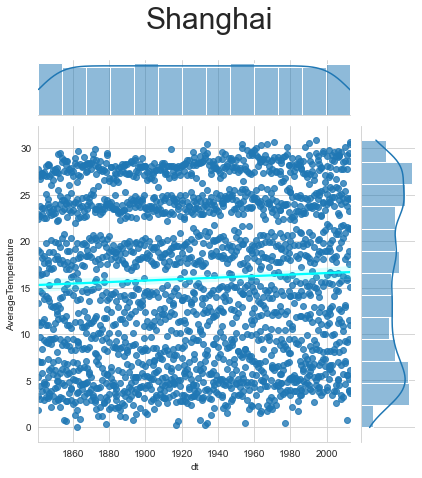

In [26]:
#Show data in graph and linear regression(cyan color)
sns.set_style('whitegrid')
axes = sns.jointplot(x= df_byCityName.dt, y= df_byCityName.AverageTemperature,kind='reg', joint_kws={'line_kws':{'color':'cyan'}})
axes.fig.suptitle(stat_Df.city_name,y=1.1,fontsize=30)

Text(0.5, 1.1, 'Shanghai')

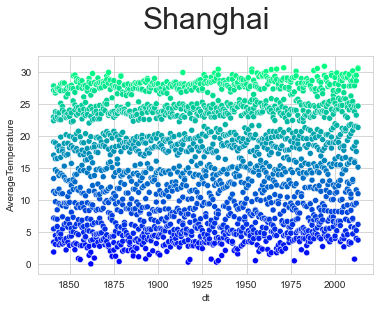

In [27]:
#Other option for graph representation
sns.set_style('whitegrid')
axes = sns.scatterplot(data= df_byCityName, x= 'dt', y= 'AverageTemperature', hue='AverageTemperature',palette= 'winter',legend=False)
axes.set_title(stat_Df.city_name,y=1.1,fontsize=30)

#hue specify which column define colors

In [28]:
# Use this command before to select new city for analysis.
# Delete variable storing the dataframe in order to select a new city
stat_Df.clear_df(df_byCityName)

Dataframe deleted


### Geopandas

In [29]:
#Geospatial analysis on dataset
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Peter")
location = lambda x: geolocator.geocode(x)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import geopandas

In [30]:
#Create dictionary to store information for each city in the "cities_name_list" array 
#Use location() function to retrive city geolocalization data
#last 2 rows of code in this notebook section can be modified in order to speed up execution 
#(just remove if for whole execution or change iteration number)
location_map = {}
for i, name in tqdm(enumerate(cities_name_list)):
    loc = location(name)
    try: 
        df_By_city = df.loc[df['City'] == name]
        maxTemp = df_By_city.AverageTemperature.max()
        minTemp = df_By_city.AverageTemperature.min()
        escTemp = maxTemp - minTemp
        location_map[name] = (loc[0], loc.longitude, loc.latitude, escTemp)
    except TypeError:
        pass
    if i > 10:
        break

0it [00:00, ?it/s]

In [31]:
location_map

{'Colatina': ('Colatina, Região Geográfica Imediata de Colatina, Região Geográfica Intermediária de Colatina, Espírito Santo, Região Sudeste, Brasil',
  -40.6287836,
  -19.5346732,
  10.32),
 'Chita': ('Чита, городской округ Чита, Забайкальский край, Дальневосточный федеральный округ, 672000, Россия',
  113.500893,
  52.033409,
  53.34700000000001),
 'Campinas': ('Campinas, Região Imediata de Campinas, Região Metropolitana de Campinas, Região Geográfica Intermediária de Campinas, São Paulo, Região Sudeste, Brasil',
  -47.06083,
  -22.90556,
  11.679),
 'Munger': ('Munger, Bihar, India',
  86.51720367235285,
  25.22081165,
  19.519000000000005),
 'Pasuruan': ('Pasuruan, Jawa Timur, Indonesia',
  112.906694,
  -7.6419894,
  4.9460000000000015),
 'San Francisco De Macorís': ('San Francisco de Macorís, Duarte, República Dominicana',
  -70.2533206,
  19.2972812,
  8.081),
 'Erfurt': ('Erfurt, Thüringen, Deutschland', 11.0287364, 50.9777974, 33.066),
 'Abakaliki': ('Abakaliki, Ebonyi, Nigeri

In [32]:
#Create and fill array with information to show in world graph
# Longitude, Latitude, Temp Excursion
info_list = []
for k, (name,lon, lat, esc) in location_map.items():
    info_list.append((lon, lat, esc))
    #info_list.append((lon, lat))
X = np.array(info_list)

In [33]:
X

array([[-40.6287836 , -19.5346732 ,  10.32      ],
       [113.500893  ,  52.033409  ,  53.347     ],
       [-47.06083   , -22.90556   ,  11.679     ],
       [ 86.51720367,  25.22081165,  19.519     ],
       [112.906694  ,  -7.6419894 ,   4.946     ],
       [-70.2533206 ,  19.2972812 ,   8.081     ],
       [ 11.0287364 ,  50.9777974 ,  33.066     ],
       [  8.1133202 ,   6.3208897 ,   6.578     ],
       [-73.5698065 ,  45.5031824 ,  44.527     ],
       [ 74.8430082 ,  12.8698101 ,   8.719     ],
       [-80.333333  ,  -5.        ,   9.997     ],
       [ 77.5381565 ,  19.9937061 ,  15.718     ]])

In [34]:
# World imange object
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

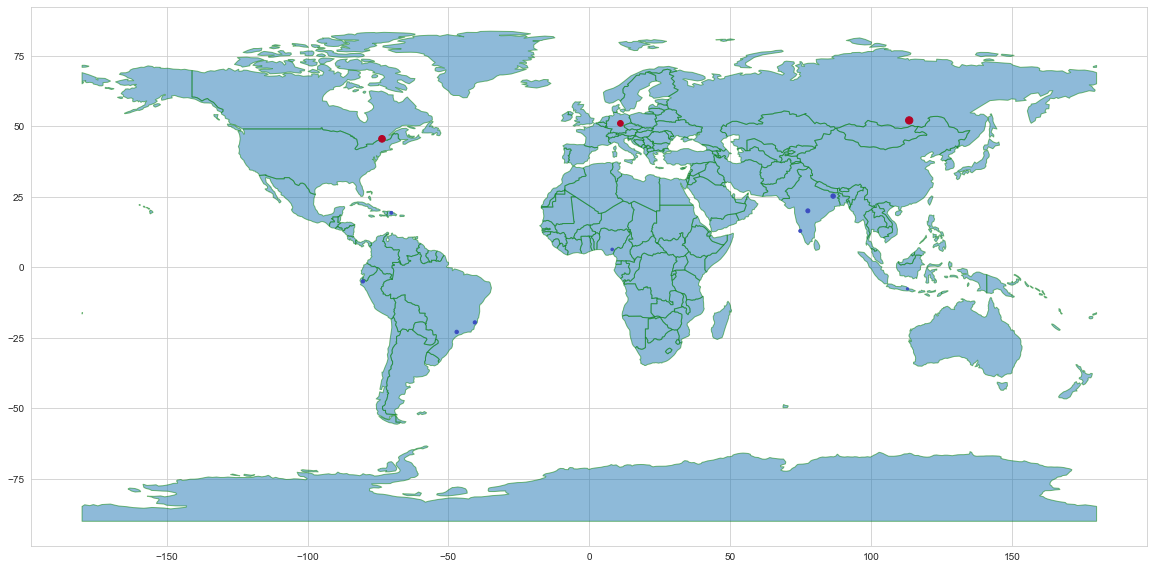

In [35]:
# Plot temp excursion data
ax = world.plot(figsize=(20 ,20), alpha= 0.5, edgecolor='g',legend=True)
ax.scatter(X[:,0], X[:,1], c = X[:,2]> 25,cmap = 'coolwarm', s= X[:,2])
plt.show()

## Avarage world TEMPERATURE

In [36]:
#Earth mean temperature 1743-2013
#Collect objects for time series analysis
years = np.unique(df['dt'])
mean_temp_world = []
mean_temp_world_uncertainty = []

In [37]:
years

array([1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 18

In [38]:
#Show graph for time series
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [39]:
for year in years:
    mean_temp_world.append(df[df['dt'] == year]['AverageTemperature'].mean())
    mean_temp_world_uncertainty.append(df[df['dt'] == year]['AverageTemperatureUncertainty'].mean())
    
trace_0 = go.Scatter(x = years, y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),fill= None,mode='lines', name='Uncertainty top',line=dict(color='rgb(0, 220, 255)',))
trace_1 = go.Scatter(x = years, y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),fill='tonexty',mode='lines',name='Uncertainty bot',line=dict(color='rgb(0, 220, 255)',))
trace_2 = go.Scatter(x = years, y = mean_temp_world,name='Mean Temperature',line=dict(color='rgb(199, 121, 093)',))
data = [trace_0, trace_1, trace_2]

layout = go.Layout(xaxis=dict(title='year'),yaxis=dict(title='Mean Temperature, °C'),title='Mean land temperature in world',showlegend = False)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_range=[-10,30])
py.iplot(fig)

In [40]:
#Look mean for specific years in the dataset
selectedYears = np.array([1800,1900,1950,1980,2000,2013])
mean_temp_world_selected = []
mean_temp_world_uncertainty_selected = []

In [41]:
for year in selectedYears:
    mean_temp_world_selected.append(df[df['dt'] == year]['AverageTemperature'].mean())
    mean_temp_world_uncertainty_selected.append(df[df['dt'] == year]['AverageTemperatureUncertainty'].mean())

In [42]:
#Create dataframe with data
mean_heart_temp = {'Years': selectedYears, 'Mean_Temp': mean_temp_world_selected, 'Precision': mean_temp_world_uncertainty_selected}
df_mean_heart_temp = pd.DataFrame(data=mean_heart_temp)
df_mean_heart_temp

,Years,Mean_Temp,Precision
0,1800,15.26,2.52
1,1900,17.62,0.78
2,1950,17.68,0.41
3,1980,17.84,0.33
4,2000,18.38,0.34
5,2013,19.06,0.55
